<a href="https://colab.research.google.com/github/ParkSangHyeon77/AI13_Section_Project/blob/main/AI_13_%EB%B0%95%EC%83%81%ED%98%84_Section2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
안녕하십니까?
AI 13기 박상현 입니다.

** Project**

Mobile Price Classification

**데이터 설명**

train 데이터와 test 데이터로 분류되어 있으며

train 데이터는 21개 컬럼, 2,000개의 rows로 구성되어 있습니다.

test 데이터는 21개 컬럼, 1,000개의 rows로 구성되어 있습니다.

가격이 예측이라고 딱 떨어지는 예측은 아니고 핸드폰 판매 할때도 프리미엄 폰, 보급형 폰, 저가형 폰으로 구분하여 판매하듯이

가격대가 0, 1, 2, 3 으로 점차 높은 가격대로 4개로 구분 됩니다.


**데이터 선정 이유**

수치형 데이터나 범주형 데이터를 분류하는 문제로 진행하고 있어서

유사한 데이터를 찾아서 진행하면 오류가 덜나고 쉽게 풀어나갈수 있을 것 같았습니다.

그래서 분류데이터를 찾고자 캐글 데이터셋에서

모바일 데이터 예측이 재미있어 살펴보니 데이터가 수치로 되어 있고 target이 범주(명목)형이라 분류를 해볼만할 것 같아 선정하게 되었습니다.


**해결해야 하는 과제**

target의 관계를 미치는 컬럼(변수)를 찾아보고

정확도가 높은 분류 방법이나 모델을 찾아서 실제로 분류를 진행 해보는 것 입니다.

'''

In [2]:
#기본적인 함수 선언 및 데이터 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

!gdown https://drive.google.com/uc?id=1-CzM9z2Y6TMBRQL53cqcC0bVsXMSK3Yb

!gdown https://drive.google.com/uc?id=1-BQQ2wPXiW3M7i8UvkB9rfrgqEsV1iwN

df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

Downloading...
From: https://drive.google.com/uc?id=1-CzM9z2Y6TMBRQL53cqcC0bVsXMSK3Yb
To: /content/train.csv
100% 122k/122k [00:00<00:00, 49.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-BQQ2wPXiW3M7i8UvkB9rfrgqEsV1iwN
To: /content/test.csv
100% 63.9k/63.9k [00:00<00:00, 57.5MB/s]


In [3]:
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [5]:
#컬럼에 대한 Data type 살펴보기
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

(None, None)

In [6]:
#간단한 통계 수치로 데이터 파악
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
#데이터 전처리를 위한 결측치 확인
df_train.isnull().sum(), df_test.isnull().sum()

(battery_power    0
 blue             0
 clock_speed      0
 dual_sim         0
 fc               0
 four_g           0
 int_memory       0
 m_dep            0
 mobile_wt        0
 n_cores          0
 pc               0
 px_height        0
 px_width         0
 ram              0
 sc_h             0
 sc_w             0
 talk_time        0
 three_g          0
 touch_screen     0
 wifi             0
 price_range      0
 dtype: int64, id               0
 battery_power    0
 blue             0
 clock_speed      0
 dual_sim         0
 fc               0
 four_g           0
 int_memory       0
 m_dep            0
 mobile_wt        0
 n_cores          0
 pc               0
 px_height        0
 px_width         0
 ram              0
 sc_h             0
 sc_w             0
 talk_time        0
 three_g          0
 touch_screen     0
 wifi             0
 dtype: int64)

In [8]:
#불필요한 컬럼 제거
df_test = df_test.drop('id', axis=1)

In [9]:
#타겟값 범주 비율 확인, 비율은 동일함, 
#데이터 2000개 중 500개씩 나눠져 있음
df_train['price_range'].value_counts(normalize=True)

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64

In [10]:
# 데이터 분포를 시각화하여 살펴보기 위해 분류 작업 진행
# unique_values를 기준으로 분류, 너무 많으면 분포로 파악하기 어려움
cat_features=list()
num_features=list()
for column_name in df_train.columns:
    unique_values = len(df_train[column_name].unique())
    if unique_values<30:
      cat_features.append(column_name)
    else:
      num_features.append(column_name)

In [11]:
#15개의 컬럼
cat_features

['blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'm_dep',
 'n_cores',
 'pc',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [12]:
# num_features는 값의 범위가 넓어 시각화를 통한 직관적 분석이 어려으므로 시각화 하지 않음
num_features

['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram']

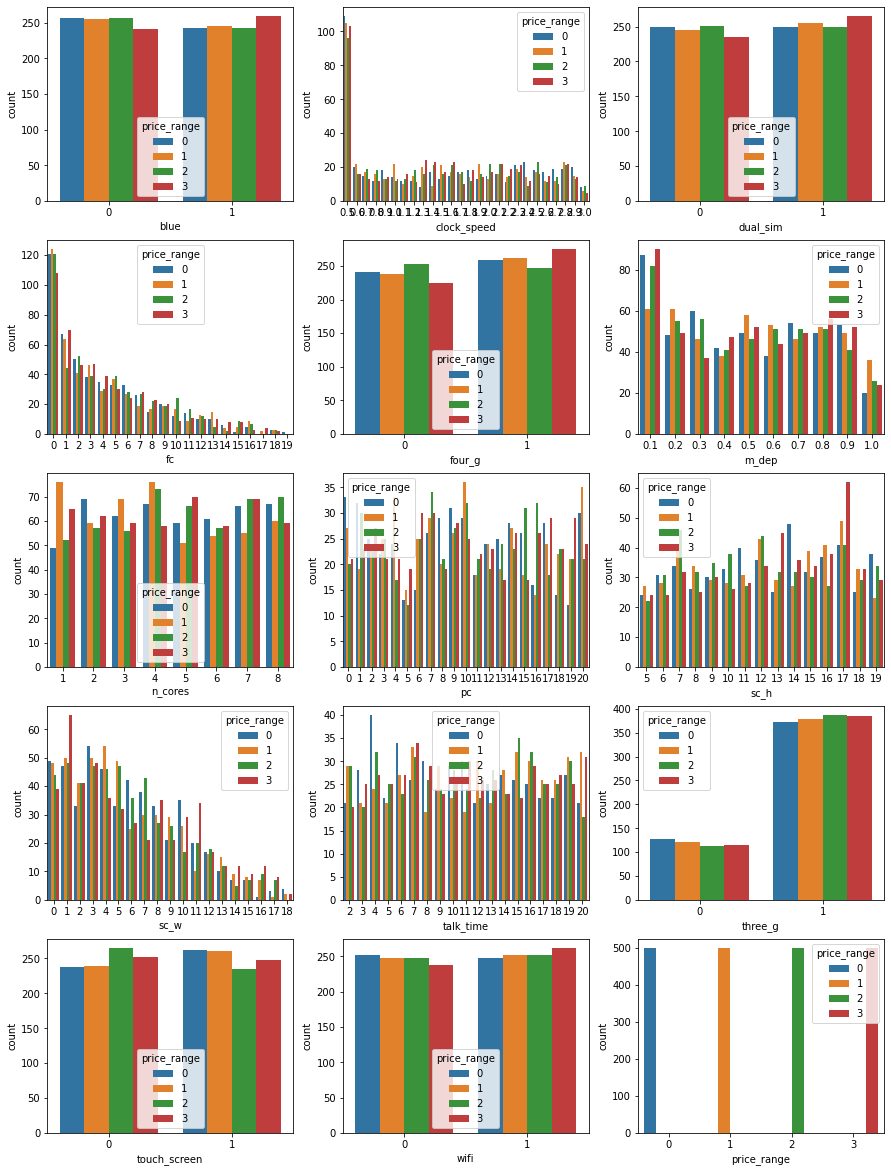

In [13]:
i = 1
plt.figure(figsize = (15,25))
for feature in cat_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , data = df_train,hue='price_range')
    i +=1

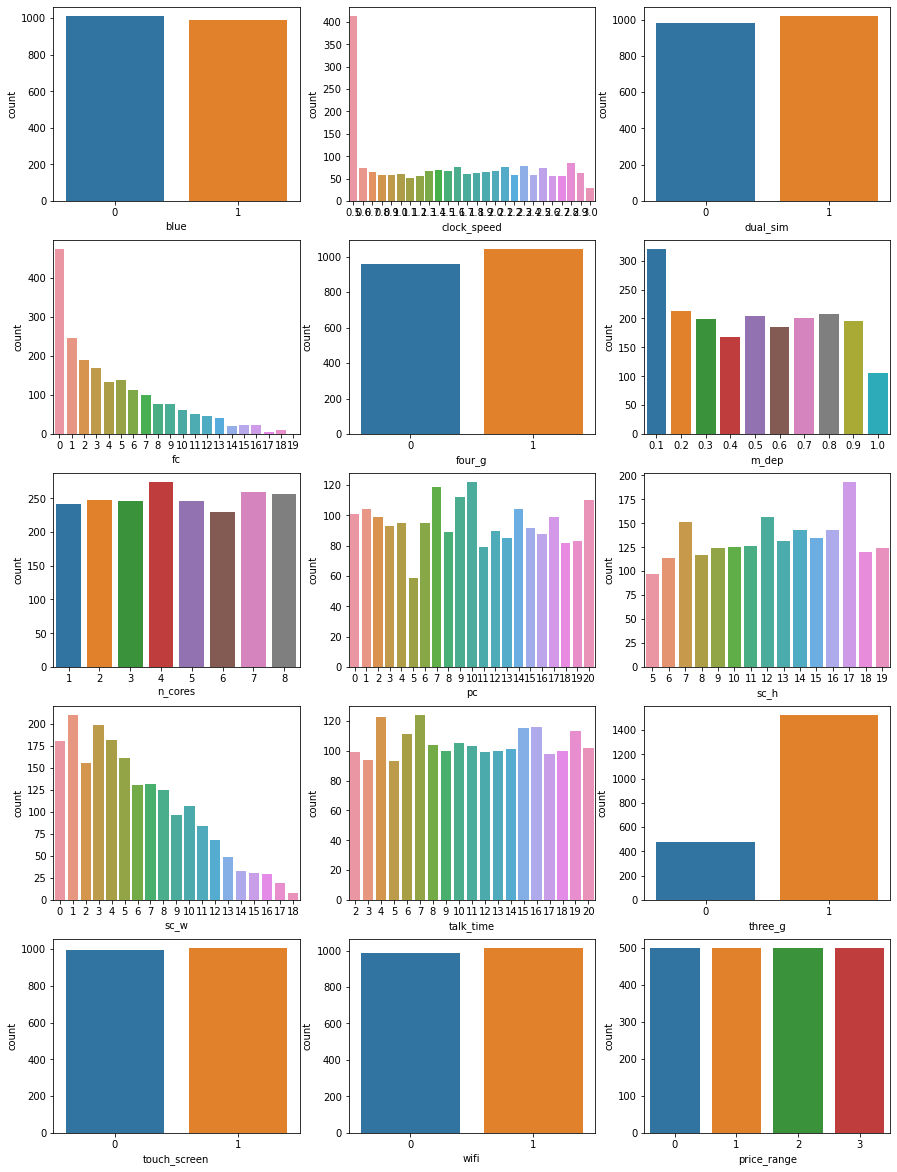

In [14]:
#target 제외한 분포 비교
i = 1
plt.figure(figsize = (15,25))
for feature in cat_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , data = df_train)
    i +=1

In [15]:
# RAM 과의 상관계수가 높게 나옴, RAM이 가격 범위 예측에 영향을 끼친다는 것을 알수 있음
correlation = df_train.corr()
print(correlation['price_range'].sort_values(ascending = False),'\n')

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64 



Index(['price_range', 'ram', 'battery_power', 'px_width', 'px_height',
       'int_memory', 'sc_w', 'pc', 'three_g', 'sc_h'],
      dtype='object')


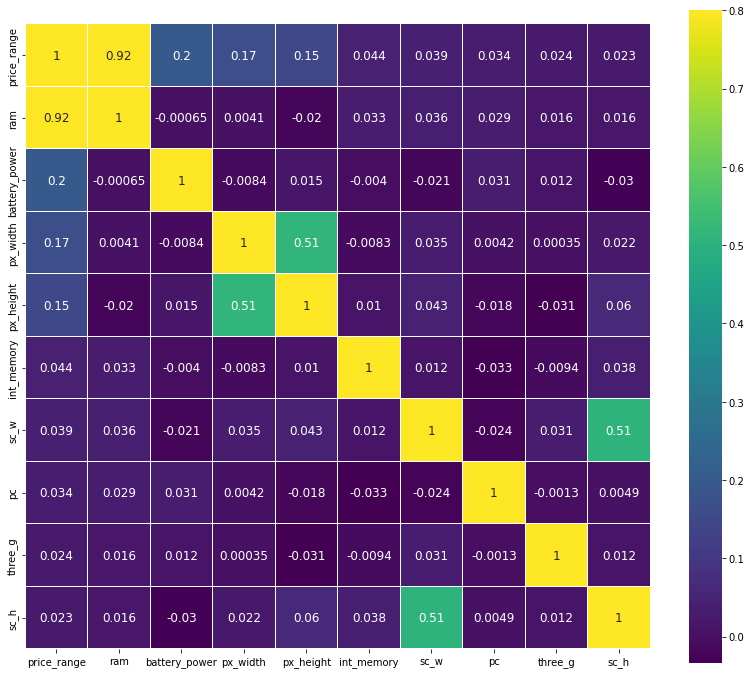

In [16]:
#상관계수 시각화
k= 10
cols = correlation.nlargest(k,'price_range')['price_range'].index
print(cols)
cm = np.corrcoef(df_train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

In [17]:
#ram : Random Access Memory in Megabytes. 애플리케이션을 실행하는 임시 메모리
#px_width : Pixel Resolution Width, 픽셀 해상도 (가로) 너비
#sc_w : Screen Width of mobile in cm, 스크린 (가로) 너비

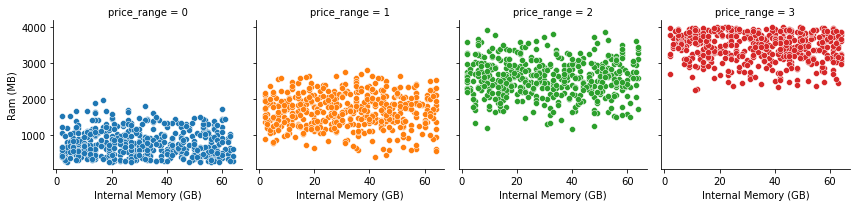

In [18]:
# RAM과 int_memory의 plot 분포를 통해서 가격 범위 내 RAM의 분포 확인
# 분포를 봤을 경우에 연관이 있을 것이라 직관적으로 판단이 됨
g = sns.FacetGrid(df_train, col="price_range", hue="price_range")
g.map(sns.scatterplot, "int_memory", "ram")
g.set_axis_labels("Internal Memory (GB)", "Ram (MB)")

In [19]:
#모델 학습 및 평가지표로 최고 모델 선정 과정 진행
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [20]:
#학습 데이터 분류하여 학습 및 평가 진행
X=df_train.drop('price_range',axis=1)
y=df_train['price_range']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [22]:
#KNN가 성능이 좋게 나옴
#살펴보고자 하는 모델의 평가지표 확인
models = [DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), LogisticRegression(),xgb.XGBClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

model: DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       158
           1       0.74      0.76      0.75       152
           2       0.83      0.76      0.79       199
           3       0.83      0.91      0.87       151

    accuracy                           0.82       660
   macro avg       0.82      0.83      0.83       660
weighted avg       0.82      0.82      0.82       660

------------------------------ 

model: RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       158
           1       0.80      0.88      0.84       152
           2       0.89      0.77      0.83       199
           3       0.87      0.92      0.90       151

    accuracy                           0.87       660
   macro avg       0.87      0.88      0.87       660
weighted avg       0.87      0.87      0.87       660

------------------------------ 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


model: LogisticRegression()
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       158
           1       0.52      0.59      0.55       152
           2       0.55      0.39      0.46       199
           3       0.60      0.79      0.68       151

    accuracy                           0.62       660
   macro avg       0.62      0.63      0.62       660
weighted avg       0.62      0.62      0.61       660

------------------------------ 

model: XGBClassifier(objective='multi:softprob')
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       158
           1       0.84      0.92      0.88       152
           2       0.90      0.83      0.86       199
           3       0.89      0.91      0.90       151

    accuracy                           0.89       660
   macro avg       0.89      0.90      0.90       660
weighted avg       0.90      0.89      0.89       660

--------------------

In [23]:
#n_neighbors=10 은 elbow_method를 통하여 살펴봤을 때 10가 가장 적절 것으로 확인
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [24]:
knn.score(X_test,y_test)

0.9212121212121213

In [25]:
#학습모델을 test data에 적용하여 예측을 진행
KNN_predicted_price=knn.predict(df_test)

In [26]:
KNN_predicted_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 1, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 2, 0, 1, 0, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 3, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [27]:
df_knn = df_test

In [28]:
df_knn

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [29]:
df_knn['price_range']=KNN_predicted_price

In [30]:
df_knn['price_range'].value_counts()

0    261
3    256
2    242
1    241
Name: price_range, dtype: int64

In [31]:
df_knn

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


In [33]:
X_1=df_knn.drop('price_range',axis=1)
y_1=df_knn['price_range']

In [34]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.33, random_state=101)

In [35]:
knn_1 = KNeighborsClassifier(n_neighbors=10)
knn_1.fit(X_train_1,y_train_1)

KNeighborsClassifier(n_neighbors=10)

In [36]:
# 학습 데이터와 유사한 정확도를 나타내어 과적합이 되지 않았다고 판다할 수 있을 것 같습니다.
knn_1.score(X_test_1,y_test_1)

0.9181818181818182

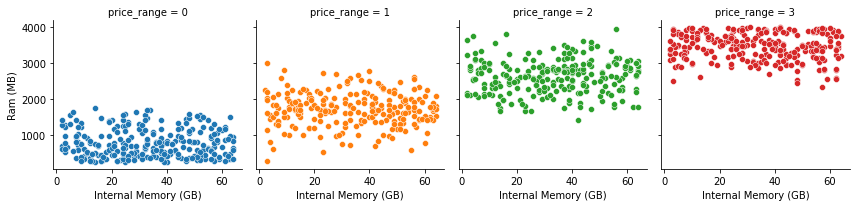

In [38]:
# RAM과 int_memory의 plot 분포 확인

g = sns.FacetGrid(df_knn, col="price_range", hue="price_range")
g.map(sns.scatterplot, "int_memory", "ram")
g.set_axis_labels("Internal Memory (GB)", "Ram (MB)")

In [37]:
# 결론 및 시사점
# 컬럼 중에서 RAM이 가격 예측을 영향을 끼친다는 것을 확인
# 이 데이터에서는 여러 분류 방법 중에서 최종적으로 KNN 분류가 정확도가 가장 높다는 것을 확인
# price_range에서 분포의 수직 범위가 0, 3에 비하여 1, 2 높아 이 것이 이상치들로 분류할 수 있는지 확인이 좀 더 필요할 것으로 보임
# 그래서인지 0과 3에 대한 정확도가, 1과 2의 정확도 보다 높게 나오며, 분류 진행한 결과 0, 3, 1, 2 순으로 많게 분류 하는 것을 확인
# 이상치가 조정이 된다면 정확도가 높아질 것으로 기대됨
# 4개 분류를 진행하였는데 데이터 핸들링을 통하여 2개 분류로 바꿀수 있지 않았을까 고민이 있었으나, 바꿨다면 과적합이나 데이터 누수가 있지 않을까 싶어 추후 좀더 확인이 필요할 것
# 학습 데이터의 수가 2,000개로 좀 적다 판단되었으나 머신러닝 분야에서 '변수의 수에 100을 곱한 것' 기준으로 2,000개가 맞아 떨어져 신뢰할만 데이터 양이라고 볼 수 있었음

# 이상 프로젝트 발표를 마치겠습니다. 감사합니다!